<IPython.core.display.Javascript object>


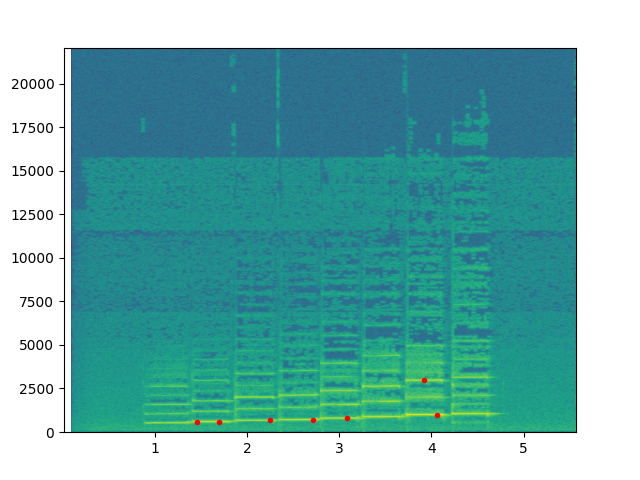

<IPython.core.display.Javascript object>


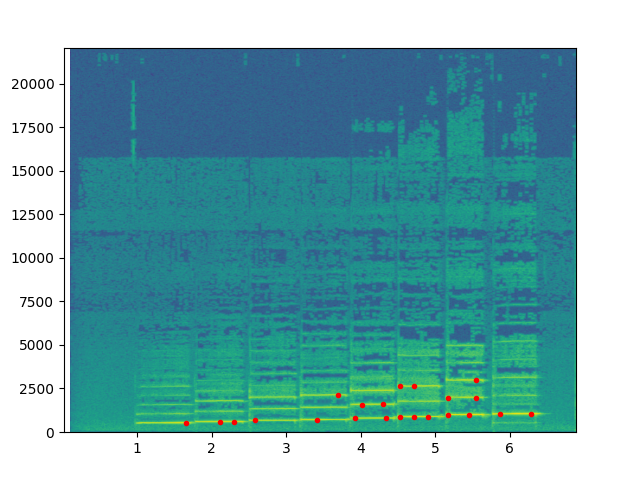

<IPython.core.display.Javascript object>


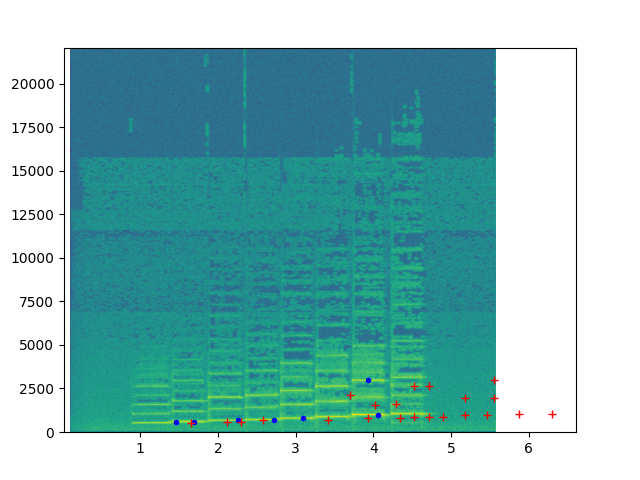

<IPython.core.display.Javascript object>


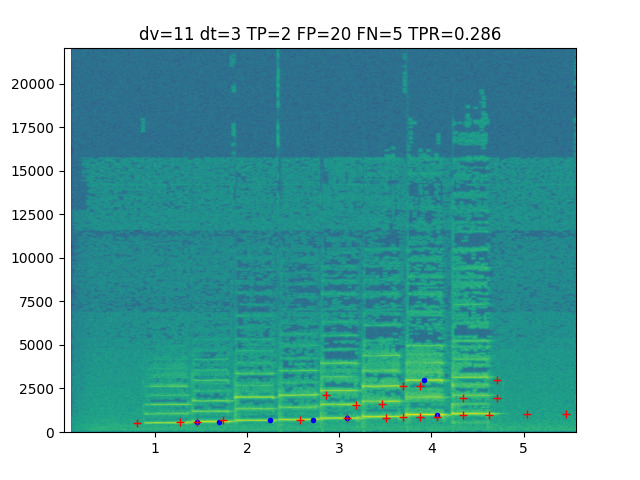

тривалість 5.589319727891157 секунд hama3.wav
кількість частот p2= 1025 1025.0 крок частоти= 21.51219512195122 Гц 21.51219512195122
кількість вікон p3= 120 кількість вікон= 120.35595703125

maxN [ 0  0 14]
max [0.         0.         0.03862816] 2999943.3345646188
max_a1 59998.0
v,t= 28 31 602.3414634146342
v,t= 28 36 602.3414634146342
v,t= 31 48 666.8780487804878
v,t= 33 58 709.9024390243902
v,t= 37 66 795.9512195121952
v,t= 138 84 2968.682926829268
v,t= 46 87 989.560975609756
1025 120
тривалість 6.912018140589569 секунд hama2.wav
кількість частот p2= 1025 1025.0 крок частоти= 21.51219512195122 Гц 21.51219512195122
кількість вікон p3= 148 кількість вікон= 148.837890625

maxN [ 0  0 18]
max [0.         0.         0.02778307] 1405395.0854869375
v2,t2 1025 148
len(p1[0]),len(p1) 148 1025
len(polotno2) 1025
len(p1) 1025
max_a1 28107.0
v,t= 24 35 516.2926829268292
v,t= 28 45 602.3414634146342
v,t= 28 49 602.3414634146342
v,t= 31 55 666.8780487804878
v,t= 33 73 709.9024390243902
v,t= 99 79 2

In [57]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from matplotlib import  mlab
import scipy.stats

%matplotlib notebook
fig1 = plt.figure()
ax1 = fig1.add_axes((0.1, 0.1, 0.8, 0.8))
fig2 = plt.figure()
ax2 = fig2.add_axes((0.1, 0.1, 0.8, 0.8))
fig3 = plt.figure()
ax3 = fig3.add_axes((0.1, 0.1, 0.8, 0.8))
fig4 = plt.figure()
ax4 = fig4.add_axes((0.1, 0.1, 0.8, 0.8))

def function(wave_data,name):
    global p1,p2,p3
    p1,p2,p3=mlab.specgram(wave_data,NFFT=CHUNK, noverlap=0, Fs=RATE)
#     print(len(p1),len(p1[0]))

    #від 0 до RATE розмістити CHUNK точок
    print('тривалість',len(wave_data)/RATE,'секунд',name)
    print('кількість частот p2=',len(p2), CHUNK/2+1, 'крок частоти=', 0.5*RATE/len(p2),'Гц', RATE/(CHUNK+2))
    print('кількість вікон p3=',len(p3), 'кількість вікон=',len(wave_data)/CHUNK)
    print()
    a = np.transpose(p1) #міняємо рядки на стовпці
    b=np.argmax(a,1) #виводимо номер максимального значення в кожному рядку
    B=np.amax(a,1) #виводимо максимальне значення в кожному рядку
#     print(b)
#     print(p2[1]-p2[0],(p2[1]-p2[0])*b[0])
    print('maxN',b[:3])
    print('max',B[:3],np.amax(p1))
    return b,len(p2),len(p3)
   
def show_specgram(wave_data,gr):    
    gr.specgram(wave_data,
        NFFT=CHUNK, noverlap=CHUNK - STEP, Fs=RATE)
#     ax2.specgram(wave_data2,
#         NFFT=CHUNK, noverlap=CHUNK - STEP, Fs=RATE)
#     ax3.specgram(wave_data,
#         NFFT=CHUNK, noverlap=CHUNK - STEP, Fs=RATE)
    plt.show()
# def show_specgram1(wave_data):
#     ax4.specgram(wave_data,
#         NFFT=CHUNK, noverlap=CHUNK - STEP, Fs=RATE)
#     plt.show()
def znach(name):
    znach1 = wave.open(name,"r")
    znach1_16 = znach1.readframes(-1)
    znach2 = np.frombuffer(znach1_16, dtype='int16')
    audio_file = wave.open(name)
    CHANNELS2 = audio_file.getnchannels()
    if CHANNELS2==2:
        znach2=znach2[::2]
    return znach2

def indx(t1):
    #ключ - число, значення - індекси зустрічей числа в t1
    # словник, тобто пара: ключ (число) і значення (список індексів списку t1 де є дане число)
    d={i: [] for i in set(t1)}
    for i in range(len(t1)):
        d[t1[i]].append(i)
    return d

def indx_riv(t2):
    mas=[]
    for i in range(len(t2)): # i - індекси t2
        if t2[i] in d: #чи є елемент t2[i] у масиві t1?
            for j in d[t2[i]]: # j - індекси t1
                mas.append(i-j)# різниця індексів однакових частот
    return mas

def max_window(y1,y2, x1,x2):
    a=np.array(p1)
    b=a[y1:y2, x1:x2]
    b_max=np.max(b)
    return b_max

# V - кількість частот, T - кількість вікон
def zirku1(V,T,polotno,gr1,c1,m1,gr2,c2,m2):    
#     max_a=65009 #3250462.02013581
    a=np.array(p1)
    b_max=np.max(a)
    max_a=b_max//50
    print('max_a1',max_a)
    for t in range(T):
        t1, t2=max(t-dt, 0), min(t+dt+1,T)
        for v in range(V):            
            v1, v2=max(v-dv,0), min(v+dv+1,V)
            if p1[v][t]>max_a and p1[v][t]==max_window(v1,v2, t1,t2):                
                polotno[v][t]=True
                print('v,t=',v,t,v*0.5*RATE/len(p2))
                if gr1!=0:
                    gr1.plot(p3[t], v*0.5*RATE/len(p2), color=c1, marker=m1,linestyle=' ')#'red', marker='.',linestyle=' ')
                gr2.plot(p3[t], v*0.5*RATE/len(p2), color=c2, marker=m2,linestyle=' ')#'blue', marker='.',linestyle=' ')
                
def zirku2(V,T):    
#     max_a=65009 #3250462.02013581
    a=np.array(p1)
    b_max=np.max(a)
    max_a=b_max//50
    print('max_a2',max_a)
    for t in range(T):
        t1, t2=max(t-dt, 0), min(t+dt+1,T)
        for v in range(V):            
            v1, v2=max(v-dv,0), min(v+dv+1,V)
            if p1[v][t]>max_a and p1[v][t]==max_window(v1,v2, t1,t2):                
                polotno2[v][t]=True
                print('v,t=',v,t,v*0.5*RATE/len(p2))
                ax2.plot(p3[t], v*0.5*RATE/len(p2), color='red', marker='.',linestyle=' ')
                ax3.plot(p3[t], v*0.5*RATE/len(p2), color='red', marker='+',linestyle=' ')
                
def zirku_sp(g1,g2,krok):
    znach_1_new=znach_1[(g1-krok)*CHUNK:len(znach_1)]
    znach_2_new=znach_2[(g2-krok)*CHUNK:len(znach_2)]
    znach_1_new=znach_1_new[:min(len(znach_1_new),len(znach_2_new))]
    znach_2_new=znach_2_new[:len(znach_1_new)]
    print('znach_1_new=', len(znach_1_new))
    show_specgram(znach_1_new,ax4)
    f1_n,v1_n,t1_n=function(znach_1_new,filename1)
    polotno1_n=[[False]*t1 for k in range(v1)]
    zirku1(v1_n,t1_n,polotno1_n,0,'red','.',ax4,'blue','.')
    
    f2_n,v2_n,t2_n=function(znach_2_new,filename2)
    polotno2_n=[[False]*t1 for k in range(v1)]
    zirku1(v2_n,t2_n,polotno2_n,0,'','',ax4,'red','+')
                
STEP = 512
RATE = 44100
CHUNK = 1024*2

dv=11
dt=3
filename1='hama3.wav'
filename2='hama2.wav'

znach_1=znach(filename1)
znach_2=znach(filename2)

# if len(znach_1)>len(znach_2):
#     znach_1,znach_2=znach_2,znach_1
#     filename1,filename2=filename2,filename1
show_specgram(znach_1,ax1)
show_specgram(znach_2,ax2)
show_specgram(znach_1,ax3)

# f1 -- міняємо рядки на стовпці p1; тоді визначаємо номер максимального значення в кожному рядку
# v1 -- p2 1025 -- кількість частот
# t1 -- p3 21 -- кількість вікон
f1,v1,t1=function(znach_1,filename1)

# print(b_max)
    
polotno1=[[False]*t1 for k in range(v1)]
zirku1(v1,t1,polotno1,ax1,'red','.',ax3,'blue','.')
print(len(polotno1),len(polotno1[0]))
f2,v2,t2=function(znach_2,filename2)

d=indx(f1)
s=indx_riv(f2)

print('v2,t2',v2,t2)
print('len(p1[0]),len(p1)',len(p1[0]),len(p1))

# v2,t2 1025 21
# len(p1[0]),len(p1) 21 1025

polotno2=[[False]*t2 for k in range(v2)]
print('len(polotno2)',len(polotno2))
print('len(p1)',len(p1))
zirku1(v2,t2,polotno2,ax2,'red','.',ax3,'red','+')

TP_mas=[]
n_w=len(polotno1[0])//3

a=np.array(polotno1)
b=np.array(polotno2)
etalon=a
zrazok=b
N=np.sum(etalon)
M=np.sum(zrazok)
print(np.sum(etalon))
print(np.sum(zrazok))
for k in range(len(a[0])-n_w):
    if np.sum(etalon[:, k:n_w+k])>0:
        for i in range(len(b[0])-n_w):
            x=np.logical_and(etalon[:, k:n_w+k], zrazok[:, i:n_w+i])
            TP_mas.append([np.sum(x),k,i])
TP_mas=sorted(TP_mas, key=lambda TP_mas: TP_mas[0], reverse=True)
print('TP=',TP_mas[0],n_w)
TP=TP_mas[0][0]
FP=M-TP
FN=N-TP
TPR=round(TP/(TP+FN),3)
print('dv=',dv,'dt=',dt)
print('TP=',TP,'FP=',FP,'FN=',FN,'TPR=',TPR,'N=',N,'M=',M)

kr=min(TP_mas[0][1:3])
etalon_zr=etalon[:, TP_mas[0][1]-kr:]
zrazok_zr=zrazok[:, TP_mas[0][2]-kr:]

etalon_zr=etalon_zr[:, :min(len(etalon_zr[0]),len(zrazok_zr[0]))]
zrazok_zr=zrazok_zr[:, :len(etalon_zr[0])]

x=np.logical_and(etalon_zr, zrazok_zr)
print(np.sum(x),np.sum(etalon_zr),np.sum(zrazok_zr))
s='dv='+str(dv)+' dt='+str(dt)+' TP='+str(TP)+' FP='+str(FP)+' FN='+str(FN)+' TPR='+str(TPR)
# ax3.set_title(s)

N=np.sum(etalon_zr)
M=np.sum(zrazok_zr)
TP=np.sum(x)
FP=M-TP
FN=N-TP
TPR=round(TP/(TP+FN),3)
print('dv=',dv,'dt=',dt)
print('TP=',TP,'FP=',FP,'FN=',FN,'TPR=',TPR)

s='dv='+str(dv)+' dt='+str(dt)+' TP='+str(TP)+' FP='+str(FP)+' FN='+str(FN)+' TPR='+str(TPR)
ax4.set_title(s)

zirku_sp(TP_mas[0][1],TP_mas[0][2],kr)
fig1.savefig('zirky2_1.png', dpi = 1000)
fig2.savefig('zirky2_2.png', dpi = 1000)
fig4.savefig('zirky2_3.png', dpi = 1000)